In [48]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        pass
        #print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

# Import Packages

In [95]:
import tensorflow as tf
import keras

# model
from keras.models import Model, Sequential

# core layers
from keras.layers import Dense, Input, Flatten, Reshape

# preprocessing_layers
from keras.layers import Resizing, Rescaling

# data augmentation layers
from keras.layers import RandomCrop, RandomFlip, RandomRotation, RandomZoom

# VGG16 model
from keras.applications import VGG16, ResNet50V2

# image utils
from keras.utils import image_dataset_from_directory, load_img, img_to_array, array_to_img
from tensorflow.keras.preprocessing.image import ImageDataGenerator

from pathlib import Path
import os

import numpy as np
import pandas as pd

import seaborn as sns

from sklearn.model_selection import train_test_split

In [50]:
# version of keras used

keras.__version__

'3.3.3'

# Data visualization

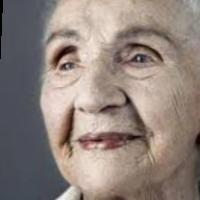

In [51]:
# load a random image

random_img_path = '/kaggle/input/utk-face-dataset/UTKFace/100_1_0_20170117195420803.jpg.chip.jpg'

img = load_img(path=random_img_path)

img

In [52]:
# size of the image

img.size

(200, 200)

# EDA

In [53]:
# generate a dataframe that has attributes from the filename

df = pd.DataFrame()

_, _, filenames = os.walk("/kaggle/input")

df['filenames'] = filenames[2]

In [54]:
# get the age of the person

df['age']=(
            df
            .loc[:,'filenames']
            .str.split("_")
            .str.get(0)
            .astype(int)
            )

In [55]:
# get the gender of the person

df['gender']=(
            df
            .loc[:,'filenames']
            .str.split("_")
            .str.get(1)
            .astype(int)
            )

In [56]:
dir_path = '/kaggle/input/utk-face-dataset/UTKFace/'

df['filenames'] = dir_path + df['filenames']

In [57]:
df.head()

,filenames,age,gender
0,/kaggle/input/utk-face-dataset/UTKFace/26_0_2_...,26,0
1,/kaggle/input/utk-face-dataset/UTKFace/22_1_1_...,22,1
2,/kaggle/input/utk-face-dataset/UTKFace/21_1_3_...,21,1
3,/kaggle/input/utk-face-dataset/UTKFace/28_0_0_...,28,0
4,/kaggle/input/utk-face-dataset/UTKFace/17_1_4_...,17,1


In [58]:
# datatypes
df.dtypes

filenames    object
age           int64
gender        int64
dtype: object

In [59]:
# check for missing values

df.isna().sum()

filenames    0
age          0
gender       0
dtype: int64

In [60]:
df_temp = df.replace({"gender":{0:"male",1:"female"}})

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-l

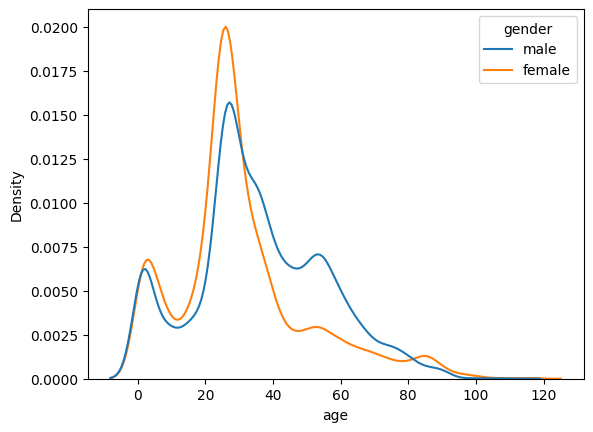

In [61]:
 # distribution of age

sns.kdeplot(data=df_temp,x='age',hue='gender');

<Axes: xlabel='gender', ylabel='count'>

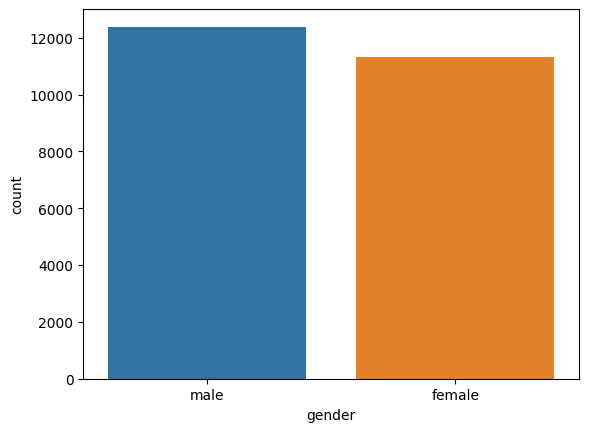

In [62]:
# count of gender

sns.countplot(data=df_temp,x='gender')

# Data Building

In [63]:
# train test split the data

train_data,val_data = train_test_split(df,test_size=0.25,random_state=2024)

train_data.shape

(17781, 3)

In [64]:
train_data

,filenames,age,gender
22208,/kaggle/input/utk-face-dataset/UTKFace/13_0_0_...,13,0
9352,/kaggle/input/utk-face-dataset/UTKFace/26_0_2_...,26,0
11914,/kaggle/input/utk-face-dataset/UTKFace/38_1_3_...,38,1
7364,/kaggle/input/utk-face-dataset/UTKFace/22_0_3_...,22,0
23621,/kaggle/input/utk-face-dataset/UTKFace/105_1_1...,105,1
...,...,...,...
14875,/kaggle/input/utk-face-dataset/UTKFace/54_1_0_...,54,1
2688,/kaggle/input/utk-face-dataset/UTKFace/34_0_0_...,34,0
19040,/kaggle/input/utk-face-dataset/UTKFace/31_1_0_...,31,1
19962,/kaggle/input/utk-face-dataset/UTKFace/27_1_3_...,27,1


In [65]:
val_data

,filenames,age,gender
19301,/kaggle/input/utk-face-dataset/UTKFace/40_1_0_...,40,1
6804,/kaggle/input/utk-face-dataset/UTKFace/32_0_1_...,32,0
803,/kaggle/input/utk-face-dataset/UTKFace/25_1_3_...,25,1
6767,/kaggle/input/utk-face-dataset/UTKFace/56_1_0_...,56,1
15680,/kaggle/input/utk-face-dataset/UTKFace/50_0_0_...,50,0
...,...,...,...
9170,/kaggle/input/utk-face-dataset/UTKFace/24_1_4_...,24,1
21736,/kaggle/input/utk-face-dataset/UTKFace/24_1_4_...,24,1
14499,/kaggle/input/utk-face-dataset/UTKFace/66_1_0_...,66,1
20250,/kaggle/input/utk-face-dataset/UTKFace/65_0_0_...,65,0


In [66]:
IMAGE_PATH = '/kaggle/input/utk-face-dataset/UTKFace'

In [67]:
train_datagen = ImageDataGenerator().flow_from_dataframe(train_data,directory=IMAGE_PATH,
                                                        x_col='filenames',y_col=['age','gender'],
                                                        target_size=(200,200),class_mode='multi_output')

Found 17781 validated image filenames.


In [68]:
test_datagen =  ImageDataGenerator().flow_from_dataframe(val_data,directory=IMAGE_PATH,
                                                        x_col='filenames',y_col=['age','gender'],
                                                        target_size=(200,200),class_mode='multi_output')

Found 5927 validated image filenames.


In [69]:
# Define constants
IMG_HEIGHT, IMG_WIDTH = 200, 200
BATCH_SIZE = 32


def load_and_preprocess_image(image_path):
    # Read image
    image = tf.io.read_file(image_path)
    # Decode image to a tensor
    image = tf.image.decode_jpeg(image, channels=3) 
    # Resize image
    image = tf.image.resize(image,[IMG_HEIGHT, IMG_WIDTH])
    return image


def load_metadata(age, gender):
    # Normalize age if needed
    age = tf.cast(age, tf.float32)
    
    gender = tf.cast(gender, tf.int32)
    return age, gender


def load_image_and_metadata(image_path, age, gender):
    image = load_and_preprocess_image(image_path)
    age, gender = load_metadata(age, gender)
    return image, (age, gender)


In [70]:
# Create train datagen

image_paths = train_data['filenames'].values
ages = train_data['age'].values
genders = train_data['gender'].values

# Create a TensorFlow Dataset
train_datagen = tf.data.Dataset.from_tensor_slices((image_paths, ages, genders))

# Map the dataset to load and preprocess both images and metadata
train_datagen = train_datagen.map(lambda image_path, age, gender: load_image_and_metadata(image_path, age, gender),
                      num_parallel_calls=tf.data.AUTOTUNE)

# Shuffle, batch, and prefetch the dataset
train_datagen = train_datagen.shuffle(buffer_size=1000) \
                 .batch(BATCH_SIZE)

In [71]:
# Create test datagen

image_paths = val_data['filenames'].values
ages = val_data['age'].values
genders = val_data['gender'].values

# Create a TensorFlow Dataset
test_datagen = tf.data.Dataset.from_tensor_slices((image_paths, ages, genders))

# Map the dataset to load and preprocess both images and metadata
test_datagen = test_datagen.map(lambda image_path, age, gender: load_image_and_metadata(image_path, age, gender),
                      num_parallel_calls=tf.data.AUTOTUNE)

# Shuffle, batch, and prefetch the dataset
test_datagen = test_datagen.shuffle(buffer_size=1000) \
                 .batch(BATCH_SIZE)

# Preprocessing and Augmentation Pipelines

## Data Augmentation

In [72]:
input_layer = Input(shape=(200,200,3),name='img')

random_flip_layer = RandomFlip(mode='horizontal',name='random_flip')

random_rotate_layer = RandomRotation(factor=0.2,fill_mode='constant',seed=2024,name='random_rotate')

random_zoom_layer = RandomZoom(height_factor=-0.2,seed=2024,name='random_zoom')

augmentations = Sequential(
    [input_layer,random_flip_layer,random_rotate_layer,random_zoom_layer], name="Augmentation"
)

In [73]:
augmentations.summary()

Model: "Augmentation"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ random_flip (RandomFlip)        │ (None, 200, 200, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ random_rotate (RandomRotation)  │ (None, 200, 200, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ random_zoom (RandomZoom)        │ (None, 200, 200, 3)    │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

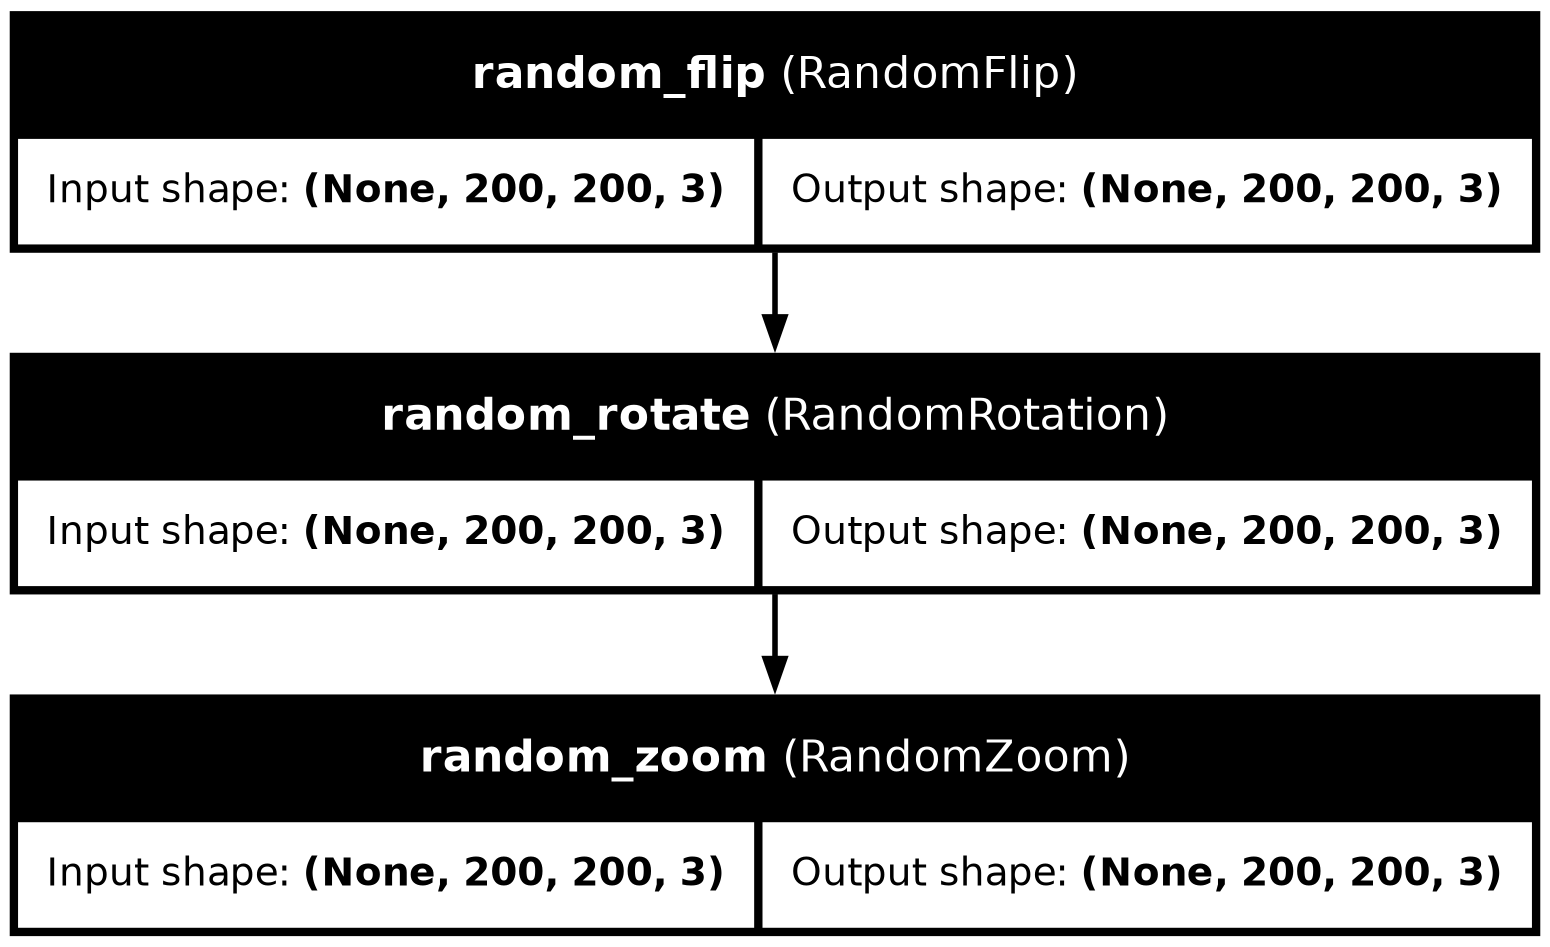

In [74]:
# plot the augmentation model

from keras.utils import plot_model

plot_model(augmentations,show_layer_names=True,show_shapes=True)

## Image Preprocessing

In [75]:
augmentations(input_layer)

<KerasTensor shape=(None, 200, 200, 3), dtype=float32, sparse=False, name=keras_tensor_37>

In [76]:
resize_layer = Resizing(height=224,width=224,name='resize')(augmentations(input_layer))

rescale_layer = Rescaling(scale=1./255)(resize_layer)

preprocessor = Model(inputs=input_layer,outputs=rescale_layer)

In [77]:
# summary of the preprocessor
preprocessor.summary()

Model: "functional_11"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ img (InputLayer)                │ (None, 200, 200, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Augmentation (Sequential)       │ (None, 200, 200, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ resize (Resizing)               │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ rescaling_1 (Rescaling)         │ (None, 224, 224, 3)    │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [78]:
# preprocessing and augmentation backbone

backbone = Model(inputs=input_layer,outputs=preprocessor.output)

In [79]:
# preprocessing backbone
backbone.summary(expand_nested=True)

Model: "functional_13"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ img (InputLayer)                │ (None, 200, 200, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Augmentation (Sequential)       │ (None, 200, 200, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│    └ random_flip (RandomFlip)   │ (None, 200, 200, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│    └ random_rotate              │ (None, 200, 200, 3)    │             0 │
│ (RandomRotation)                │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│    └ random_zoom (RandomZoom)   │ (None, 200, 200, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ resize (Resizing)               │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ rescaling_1 (Rescaling)         │ (None, 224, 224, 3)    │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

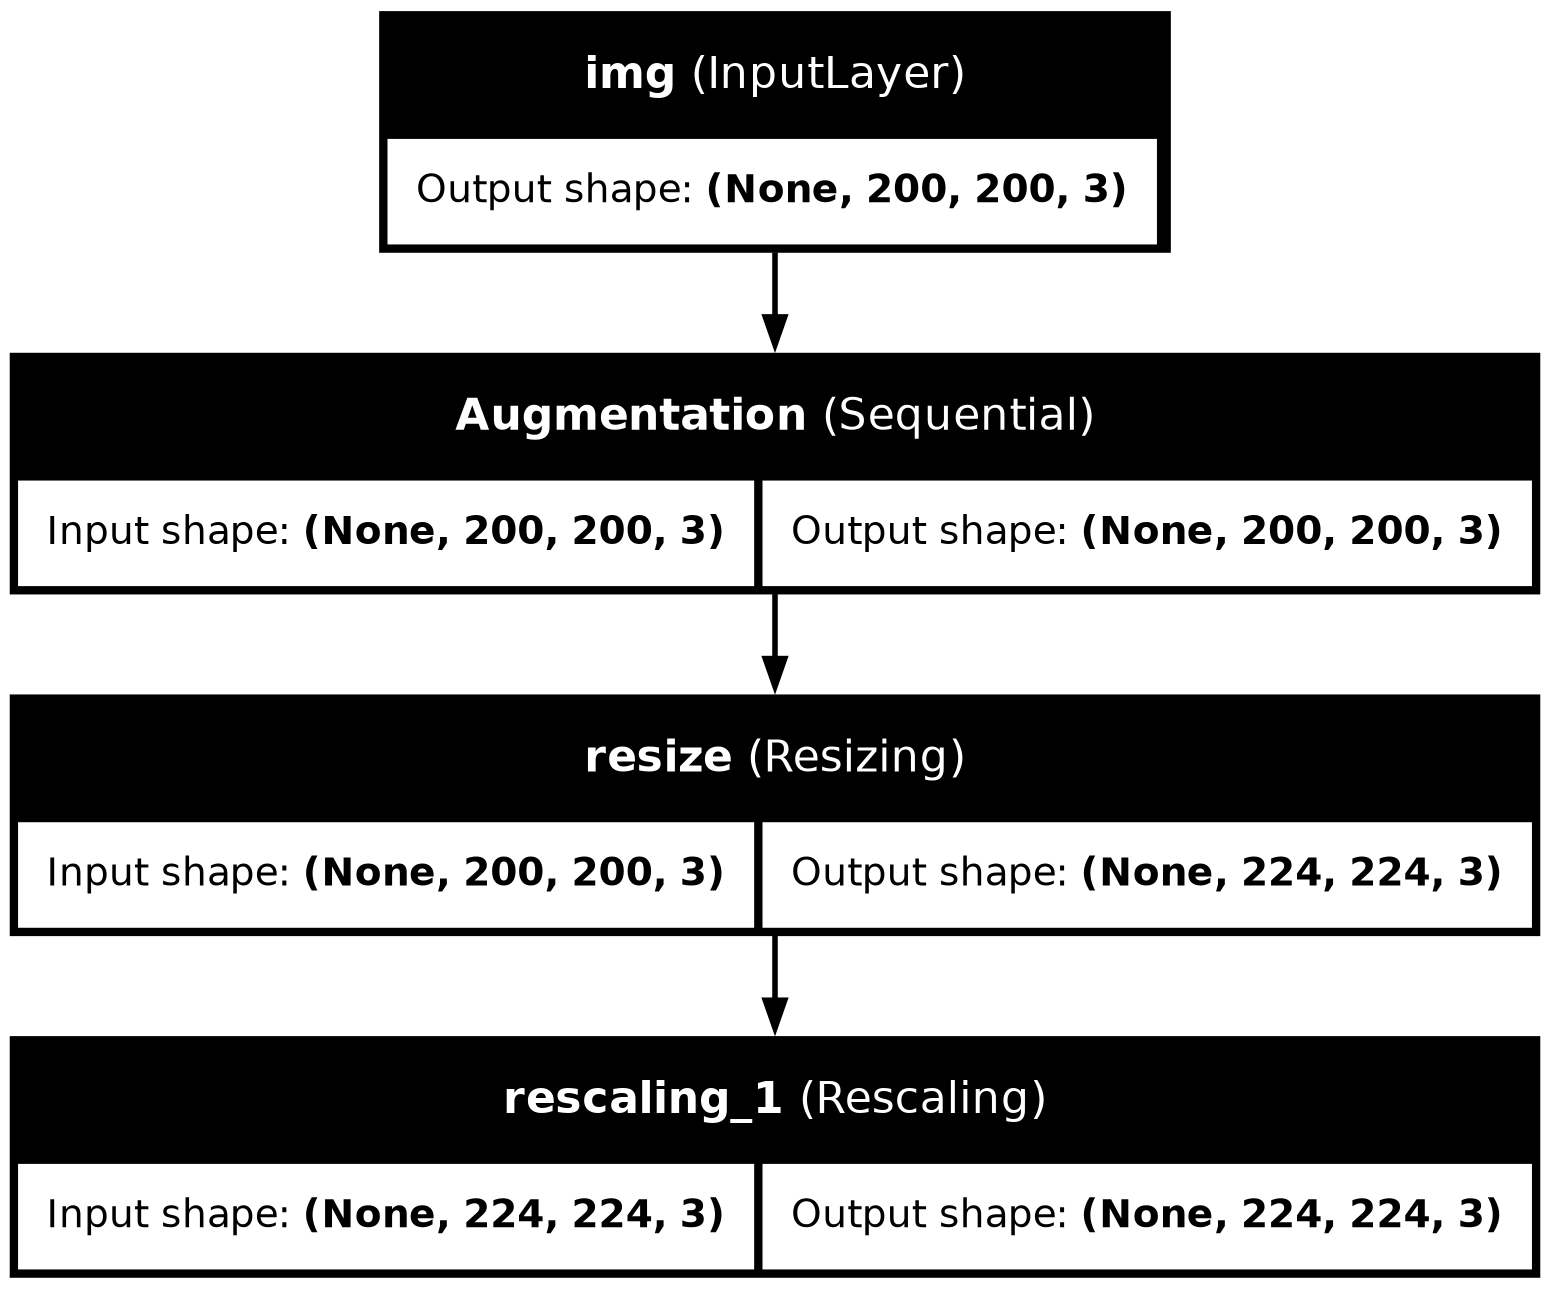

In [80]:
plot_model(backbone,show_layer_names=True,show_shapes=True)

# Build Model

In [81]:
# download the VGG16 model

vgg16 = VGG16(include_top=False,weights='imagenet',
             input_shape=(224,224,3))

In [ ]:
# download the resnet model

#resnet = ResNet50V2()

In [82]:
vgg16.summary(show_trainable=True)

Model: "vgg16"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━┓
┃ Layer (type)                ┃ Output Shape          ┃    Param # ┃ Trai… ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━┩
│ input_layer_1 (InputLayer)  │ (None, 224, 224, 3)   │          0 │   -   │
├─────────────────────────────┼───────────────────────┼────────────┼───────┤
│ block1_conv1 (Conv2D)       │ (None, 224, 224, 64)  │      1,792 │   Y   │
├─────────────────────────────┼───────────────────────┼────────────┼───────┤
│ block1_conv2 (Conv2D)       │ (None, 224, 224, 64)  │     36,928 │   Y   │
├─────────────────────────────┼───────────────────────┼────────────┼───────┤
│ block1_pool (MaxPooling2D)  │ (None, 112, 112, 64)  │          0 │   -   │
├─────────────────────────────┼───────────────────────┼────────────┼───────┤
│ block2_conv1 (Conv2D)       │ (None, 112, 112, 128) │     73,856 │   Y   │
├─────────────────────────────┼───────────────────────┼────────────┼───────┤
│ block2_conv2 (Conv2D)       │ (None, 112, 112, 128) │    147,584 │   Y   │
├─────────────────────────────┼───────────────────────┼────────────┼───────┤
│ block2_pool (MaxPooling2D)  │ (None, 56, 56, 128)   │          0 │   -   │
├─────────────────────────────┼───────────────────────┼────────────┼───────┤
│ block3_conv1 (Conv2D)       │ (None, 56, 56, 256)   │    295,168 │   Y   │
├─────────────────────────────┼───────────────────────┼────────────┼───────┤
│ block3_conv2 (Conv2D)       │ (None, 56, 56, 256)   │    590,080 │   Y   │
├─────────────────────────────┼───────────────────────┼────────────┼───────┤
│ block3_conv3 (Conv2D)       │ (None, 56, 56, 256)   │    590,080 │   Y   │
├─────────────────────────────┼───────────────────────┼────────────┼───────┤
│ block3_pool (MaxPooling2D)  │ (None, 28, 28, 256)   │          0 │   -   │
├─────────────────────────────┼───────────────────────┼────────────┼───────┤
│ block4_conv1 (Conv2D)       │ (None, 28, 28, 512)   │  1,180,160 │   Y   │
├─────────────────────────────┼───────────────────────┼────────────┼───────┤
│ block4_conv2 (Conv2D)       │ (None, 28, 28, 512)   │  2,359,808 │   Y   │
├─────────────────────────────┼───────────────────────┼────────────┼───────┤
│ block4_conv3 (Conv2D)       │ (None, 28, 28, 512)   │  2,359,808 │   Y   │
├─────────────────────────────┼───────────────────────┼────────────┼───────┤
│ block4_pool (MaxPooling2D)  │ (None, 14, 14, 512)   │          0 │   -   │
├─────────────────────────────┼───────────────────────┼────────────┼───────┤
│ block5_conv1 (Conv2D)       │ (None, 14, 14, 512)   │  2,359,808 │   Y   │
├─────────────────────────────┼───────────────────────┼────────────┼───────┤
│ block5_conv2 (Conv2D)       │ (None, 14, 14, 512)   │  2,359,808 │   Y   │
├─────────────────────────────┼───────────────────────┼────────────┼───────┤
│ block5_conv3 (Conv2D)       │ (None, 14, 14, 512)   │  2,359,808 │   Y   │
├─────────────────────────────┼───────────────────────┼────────────┼───────┤
│ block5_pool (MaxPooling2D)  │ (None, 7, 7, 512)     │          0 │   -   │
└─────────────────────────────┴───────────────────────┴────────────┴───────┘

 Total params: 14,714,688 (56.13 MB)

 Trainable params: 14,714,688 (56.13 MB)

 Non-trainable params: 0 (0.00 B)

In [83]:
# set the vgg16 weights to be non-trainable
vgg16.trainable = False

In [84]:
vgg16.summary(show_trainable=True)

Model: "vgg16"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━┓
┃ Layer (type)                ┃ Output Shape          ┃    Param # ┃ Trai… ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━┩
│ input_layer_1 (InputLayer)  │ (None, 224, 224, 3)   │          0 │   -   │
├─────────────────────────────┼───────────────────────┼────────────┼───────┤
│ block1_conv1 (Conv2D)       │ (None, 224, 224, 64)  │      1,792 │   N   │
├─────────────────────────────┼───────────────────────┼────────────┼───────┤
│ block1_conv2 (Conv2D)       │ (None, 224, 224, 64)  │     36,928 │   N   │
├─────────────────────────────┼───────────────────────┼────────────┼───────┤
│ block1_pool (MaxPooling2D)  │ (None, 112, 112, 64)  │          0 │   -   │
├─────────────────────────────┼───────────────────────┼────────────┼───────┤
│ block2_conv1 (Conv2D)       │ (None, 112, 112, 128) │     73,856 │   N   │
├─────────────────────────────┼───────────────────────┼────────────┼───────┤
│ block2_conv2 (Conv2D)       │ (None, 112, 112, 128) │    147,584 │   N   │
├─────────────────────────────┼───────────────────────┼────────────┼───────┤
│ block2_pool (MaxPooling2D)  │ (None, 56, 56, 128)   │          0 │   -   │
├─────────────────────────────┼───────────────────────┼────────────┼───────┤
│ block3_conv1 (Conv2D)       │ (None, 56, 56, 256)   │    295,168 │   N   │
├─────────────────────────────┼───────────────────────┼────────────┼───────┤
│ block3_conv2 (Conv2D)       │ (None, 56, 56, 256)   │    590,080 │   N   │
├─────────────────────────────┼───────────────────────┼────────────┼───────┤
│ block3_conv3 (Conv2D)       │ (None, 56, 56, 256)   │    590,080 │   N   │
├─────────────────────────────┼───────────────────────┼────────────┼───────┤
│ block3_pool (MaxPooling2D)  │ (None, 28, 28, 256)   │          0 │   -   │
├─────────────────────────────┼───────────────────────┼────────────┼───────┤
│ block4_conv1 (Conv2D)       │ (None, 28, 28, 512)   │  1,180,160 │   N   │
├─────────────────────────────┼───────────────────────┼────────────┼───────┤
│ block4_conv2 (Conv2D)       │ (None, 28, 28, 512)   │  2,359,808 │   N   │
├─────────────────────────────┼───────────────────────┼────────────┼───────┤
│ block4_conv3 (Conv2D)       │ (None, 28, 28, 512)   │  2,359,808 │   N   │
├─────────────────────────────┼───────────────────────┼────────────┼───────┤
│ block4_pool (MaxPooling2D)  │ (None, 14, 14, 512)   │          0 │   -   │
├─────────────────────────────┼───────────────────────┼────────────┼───────┤
│ block5_conv1 (Conv2D)       │ (None, 14, 14, 512)   │  2,359,808 │   N   │
├─────────────────────────────┼───────────────────────┼────────────┼───────┤
│ block5_conv2 (Conv2D)       │ (None, 14, 14, 512)   │  2,359,808 │   N   │
├─────────────────────────────┼───────────────────────┼────────────┼───────┤
│ block5_conv3 (Conv2D)       │ (None, 14, 14, 512)   │  2,359,808 │   N   │
├─────────────────────────────┼───────────────────────┼────────────┼───────┤
│ block5_pool (MaxPooling2D)  │ (None, 7, 7, 512)     │          0 │   -   │
└─────────────────────────────┴───────────────────────┴────────────┴───────┘

 Total params: 14,714,688 (56.13 MB)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 14,714,688 (56.13 MB)

In [85]:
backbone.summary()

Model: "functional_13"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ img (InputLayer)                │ (None, 200, 200, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Augmentation (Sequential)       │ (None, 200, 200, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ resize (Resizing)               │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ rescaling_1 (Rescaling)         │ (None, 224, 224, 3)    │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [86]:
# stitch the preprocessing to vgg16

vgg_16_aug = vgg16(backbone.output)

In [87]:
# summary of the model
model_interim = Model(inputs=input_layer,outputs=vgg_16_aug)

model_interim.summary(show_trainable=True)

Model: "functional_15"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━┓
┃ Layer (type)                ┃ Output Shape          ┃    Param # ┃ Trai… ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━┩
│ img (InputLayer)            │ (None, 200, 200, 3)   │          0 │   -   │
├─────────────────────────────┼───────────────────────┼────────────┼───────┤
│ Augmentation (Sequential)   │ (None, 200, 200, 3)   │          0 │   -   │
├─────────────────────────────┼───────────────────────┼────────────┼───────┤
│ resize (Resizing)           │ (None, 224, 224, 3)   │          0 │   -   │
├─────────────────────────────┼───────────────────────┼────────────┼───────┤
│ rescaling_1 (Rescaling)     │ (None, 224, 224, 3)   │          0 │   -   │
├─────────────────────────────┼───────────────────────┼────────────┼───────┤
│ vgg16 (Functional)          │ (None, 7, 7, 512)     │ 14,714,688 │   N   │
└─────────────────────────────┴───────────────────────┴────────────┴───────┘

 Total params: 14,714,688 (56.13 MB)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 14,714,688 (56.13 MB)

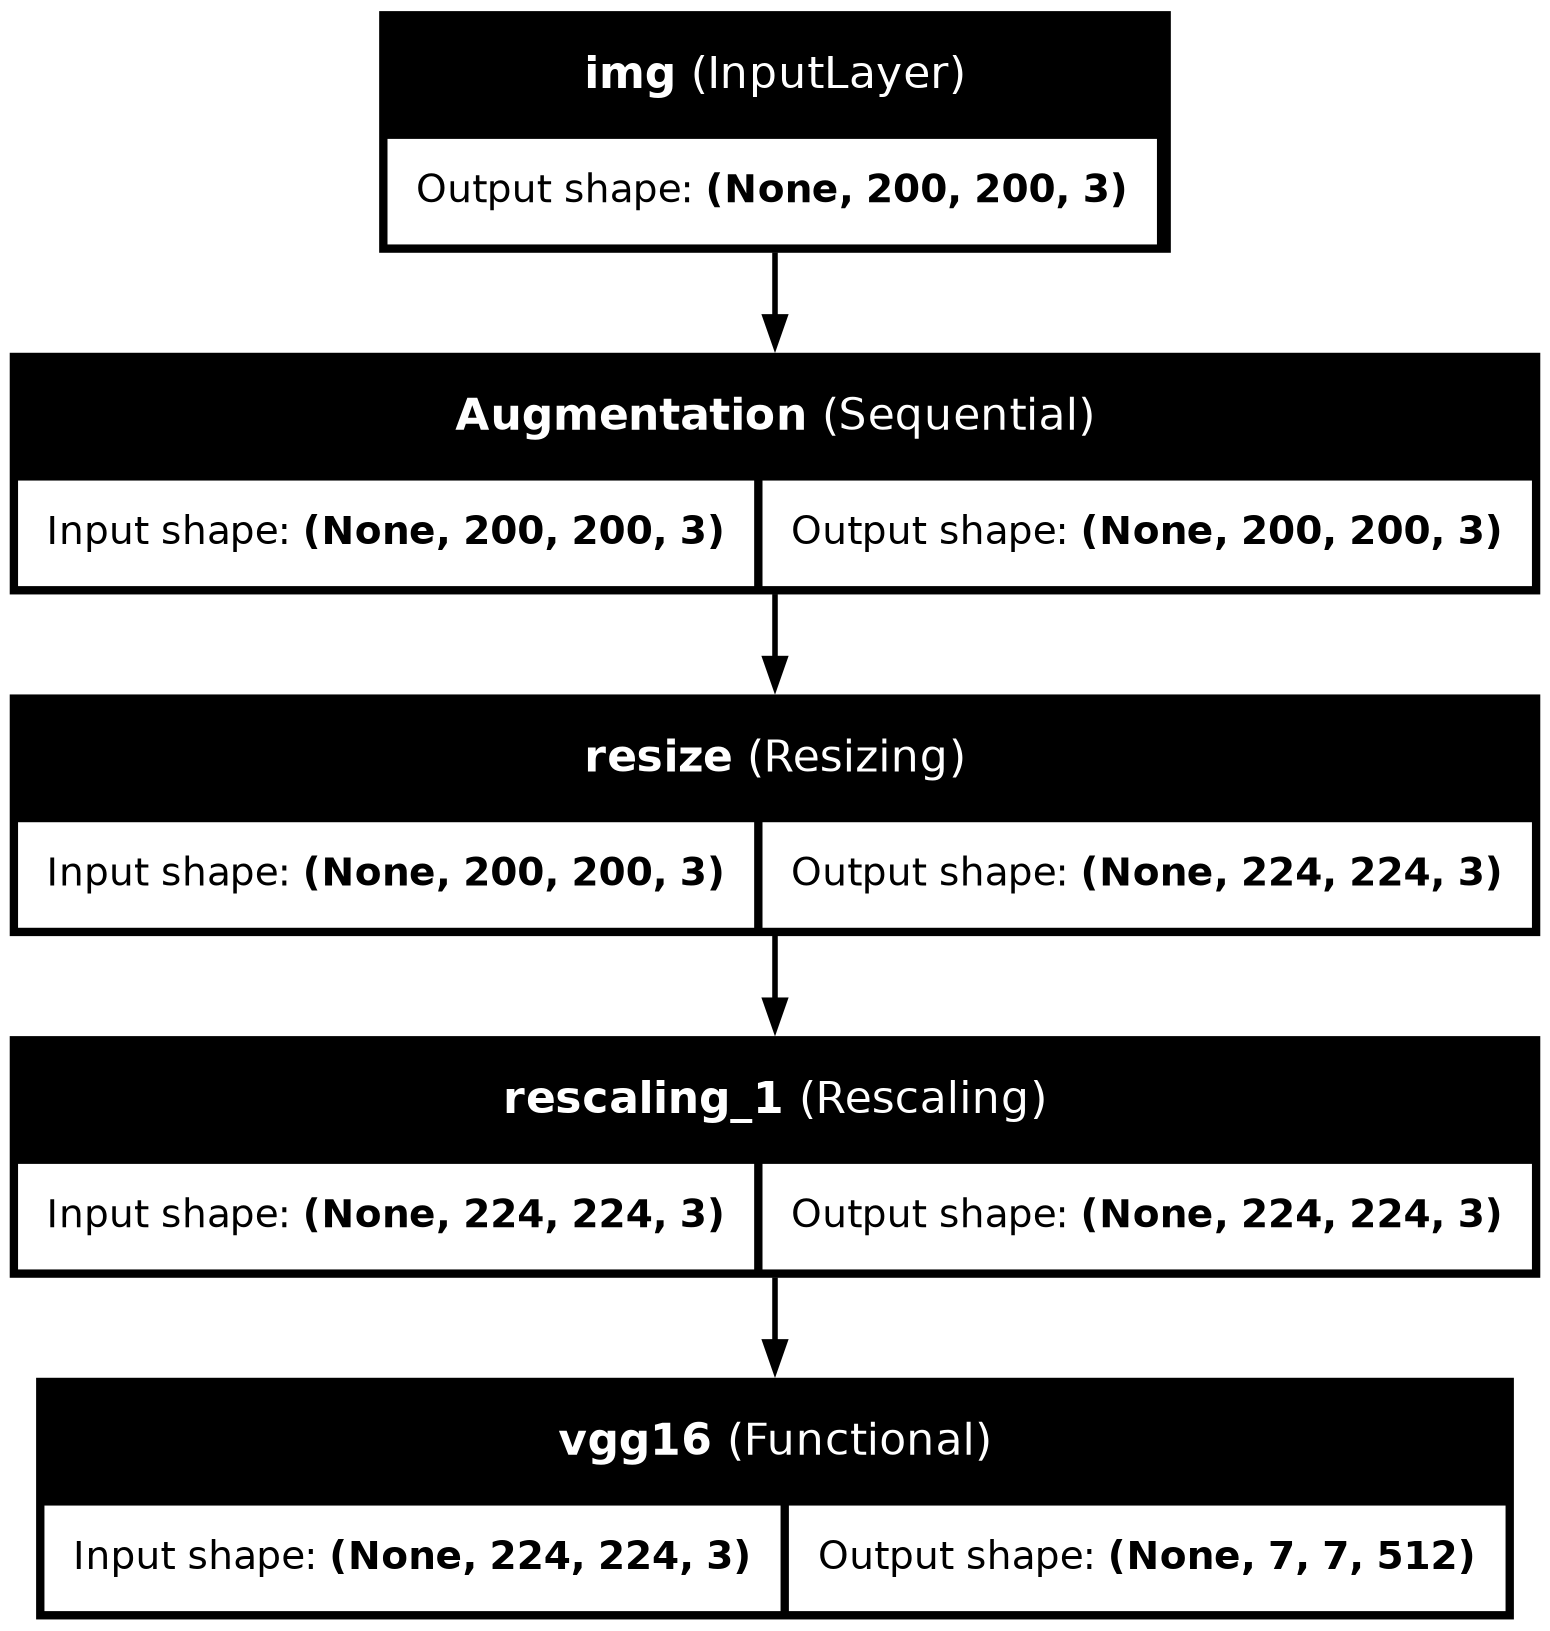

In [88]:
# plot model

plot_model(model_interim,show_shapes=True,show_layer_names=True)

In [96]:
# build the fully connected layers

flatten_layer = Flatten()(model_interim.output)

# hidden layers for age
hidden_1_a = Dense(units=256,activation='relu',name='hidden1_a')(flatten_layer)
hidden_2_a = Dense(units=128,activation='relu',name='hidden2_a')(hidden_1_a)

# hidden layers for gender
hidden_1_b = Dense(units=256,activation='relu',name='hidden1_b')(flatten_layer)
hidden_2_b = Dense(units=128,activation='relu',name='hidden2_b')(hidden_1_b)
hidden_3_b = Dense(units=64,activation='relu',name='hidden3_b')(hidden_2_b)

# output layers
output_age = Dense(units=1,activation='linear',name='age_output')(hidden_2_a)
output_gender = Dense(units=1,activation='sigmoid',name='gender_output')(hidden_3_b)

In [97]:
# build the final model


model = Model(inputs=input_layer,outputs=[output_age,output_gender])

In [98]:
# summary of the final model

model.summary()

Model: "functional_19"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ img (InputLayer)    │ (None, 200, 200,  │          0 │ -                 │
│                     │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ Augmentation        │ (None, 200, 200,  │          0 │ img[0][0]         │
│ (Sequential)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ resize (Resizing)   │ (None, 224, 224,  │          0 │ Augmentation[1][… │
│                     │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ rescaling_1         │ (None, 224, 224,  │          0 │ resize[0][0]      │
│ (Rescaling)         │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ vgg16 (Functional)  │ (None, 7, 7, 512) │ 14,714,688 │ rescaling_1[0][0] │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ flatten_2 (Flatten) │ (None, 25088)     │          0 │ vgg16[0][0]       │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ hidden1_b (Dense)   │ (None, 256)       │  6,422,784 │ flatten_2[0][0]   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ hidden1_a (Dense)   │ (None, 256)       │  6,422,784 │ flatten_2[0][0]   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ hidden2_b (Dense)   │ (None, 128)       │     32,896 │ hidden1_b[0][0]   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ hidden2_a (Dense)   │ (None, 128)       │     32,896 │ hidden1_a[0][0]   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ hidden3_b (Dense)   │ (None, 64)        │      8,256 │ hidden2_b[0][0]   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ age_output (Dense)  │ (None, 1)         │        129 │ hidden2_a[0][0]   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ gender_output       │ (None, 1)         │         65 │ hidden3_b[0][0]   │
│ (Dense)             │                   │            │                   │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 27,634,498 (105.42 MB)

 Trainable params: 12,919,810 (49.29 MB)

 Non-trainable params: 14,714,688 (56.13 MB)

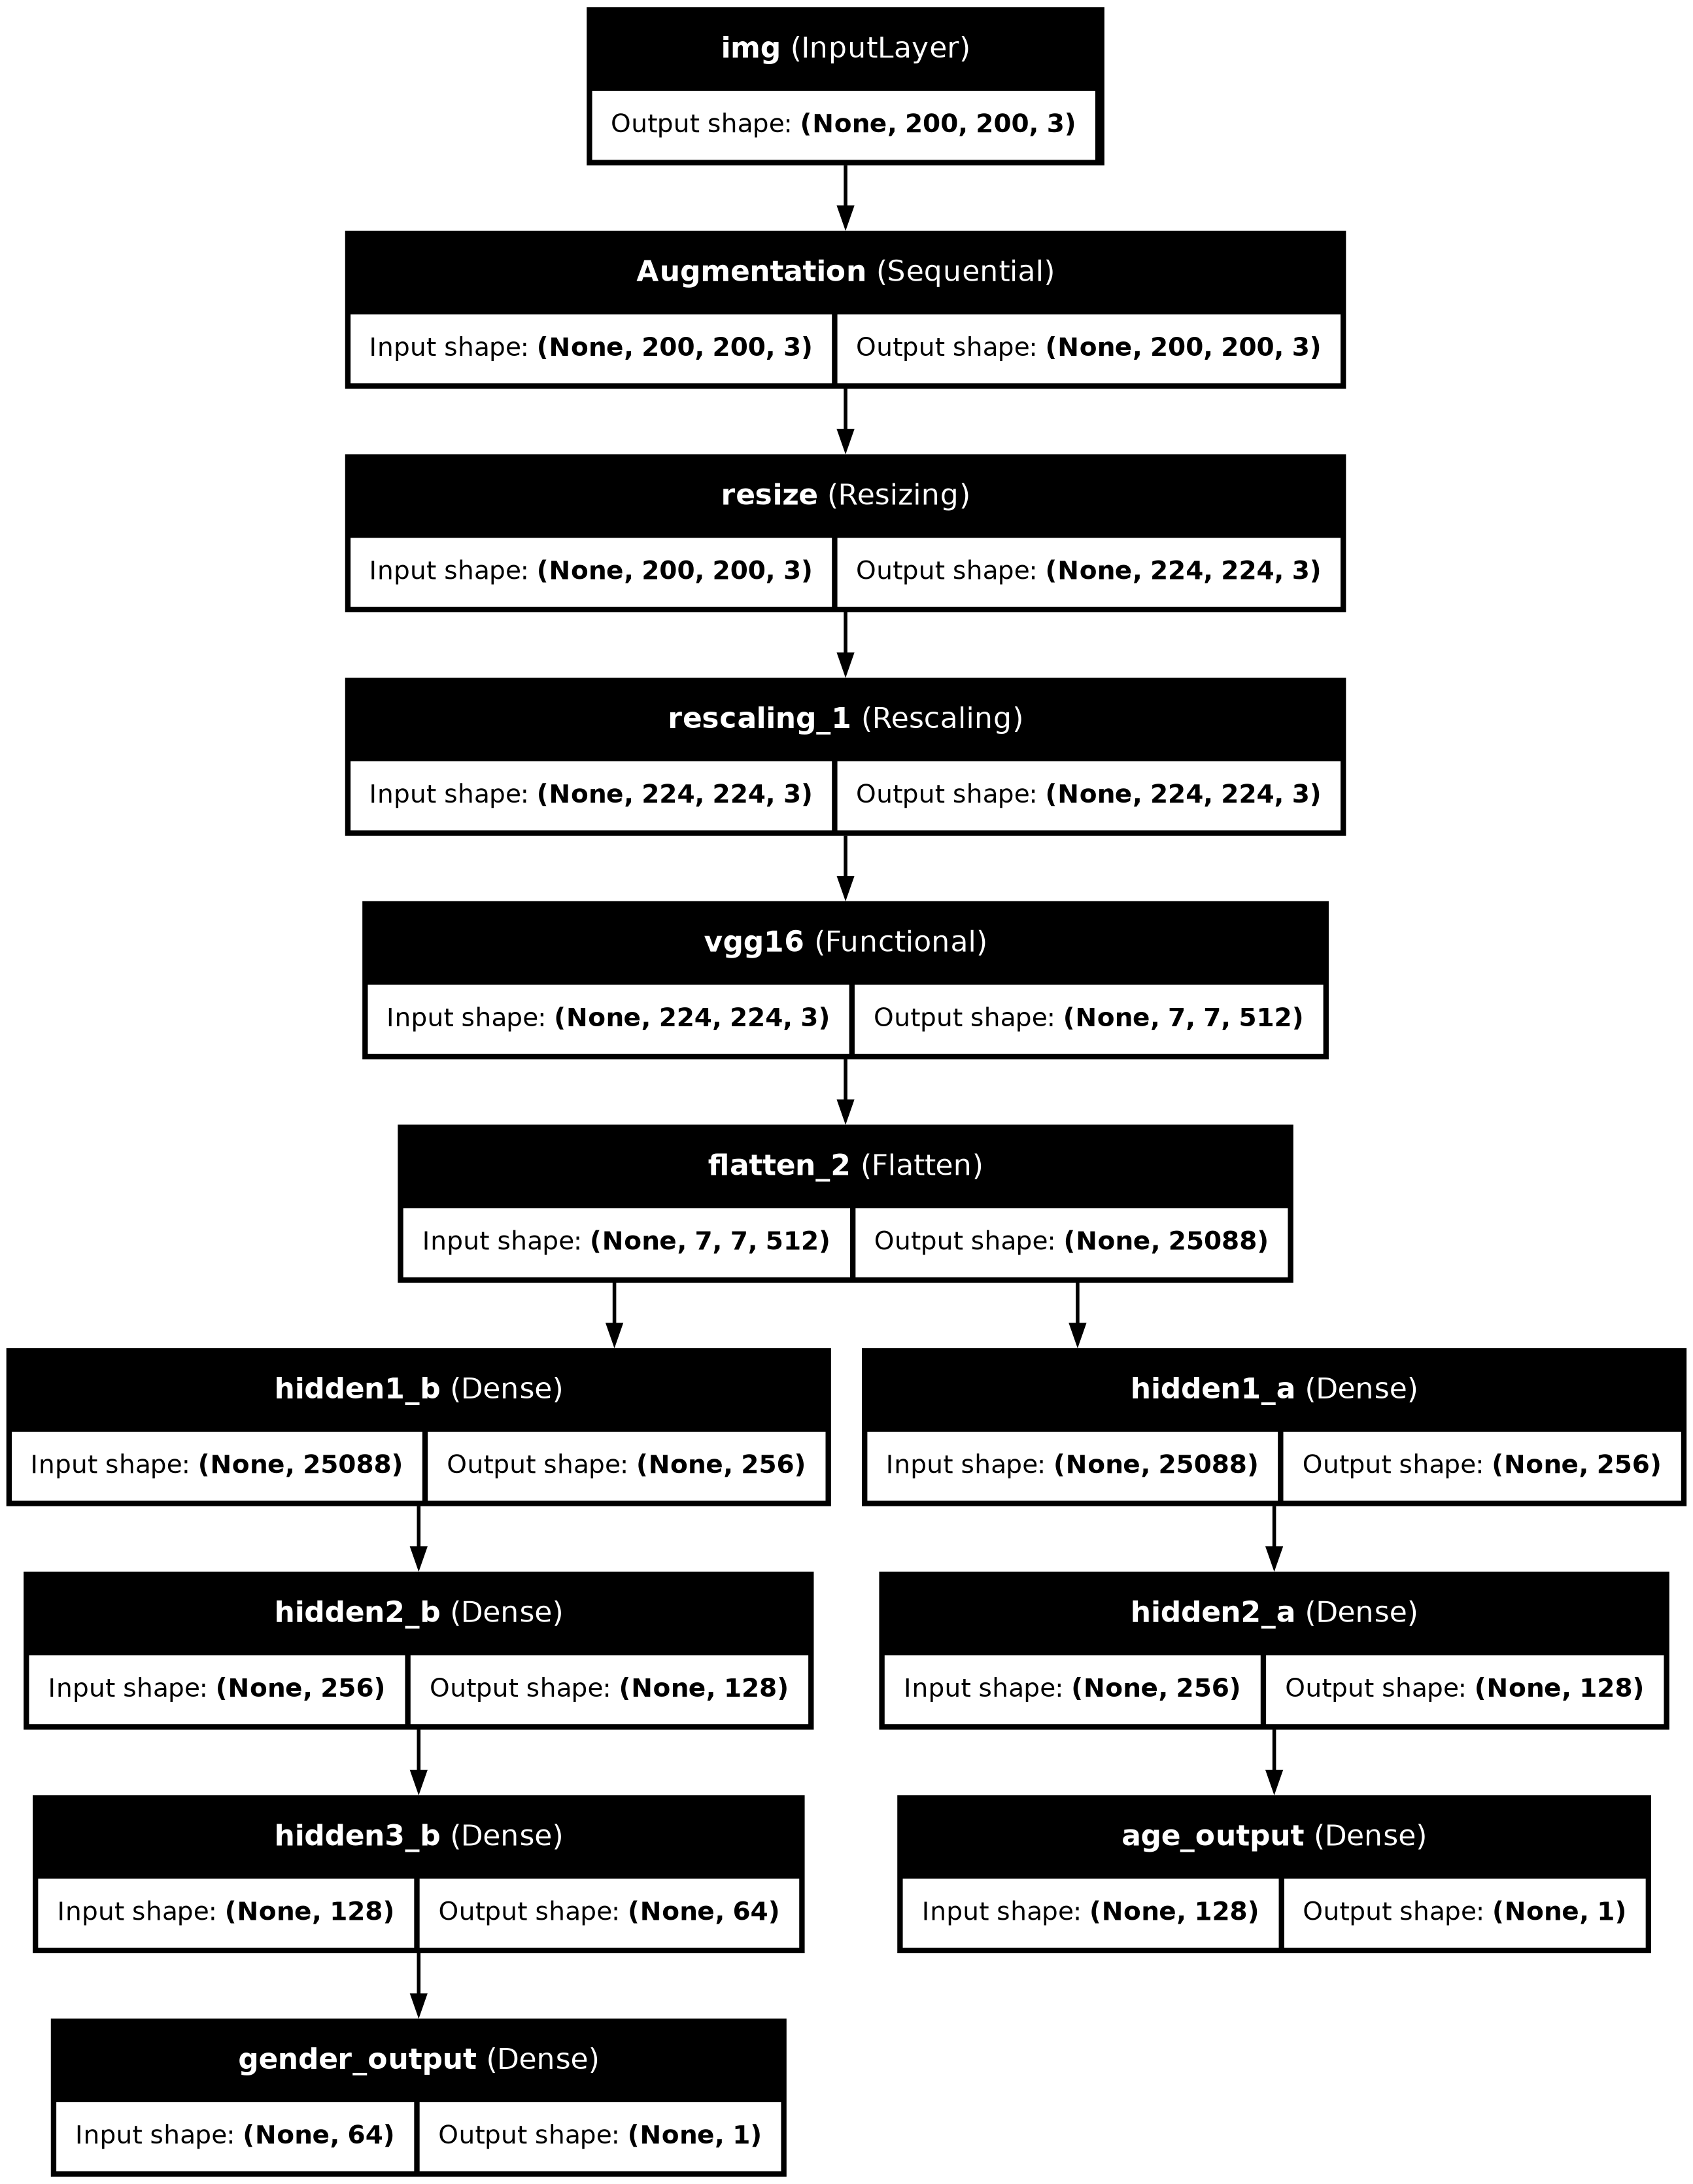

In [99]:
# plot the final model

plot_model(model,show_shapes=True,show_layer_names=True)

In [100]:
# compile the final model

model.compile(optimizer='adam',
              loss={"age_output":"mae",
                    "gender_output":"binary_crossentropy"},
              metrics={"age_output":"mae",
                       "gender_output":"accuracy"})

# Model Training

In [101]:
# fit the model for 5 epochs
y_train = [train_data['age'].values,train_data['gender'].values]
y_test = [val_data['age'].values,val_data['gender'].values]

model.fit(x=train_datagen,epochs=5,validation_data=test_datagen)

Epoch 1/5
556/556 ━━━━━━━━━━━━━━━━━━━━ 123s 216ms/step - age_output_mae: 12.3206 - gender_output_accuracy: 0.6922 - loss: 12.9143 - val_age_output_mae: 9.0780 - val_gender_output_accuracy: 0.8119 - val_loss: 9.4807
Epoch 2/5
556/556 ━━━━━━━━━━━━━━━━━━━━ 142s 215ms/step - age_output_mae: 8.9653 - gender_output_accuracy: 0.7981 - loss: 9.3961 - val_age_output_mae: 8.5060 - val_gender_output_accuracy: 0.7596 - val_loss: 8.9900
Epoch 3/5
556/556 ━━━━━━━━━━━━━━━━━━━━ 119s 214ms/step - age_output_mae: 8.4427 - gender_output_accuracy: 0.8160 - loss: 8.8374 - val_age_output_mae: 8.5003 - val_gender_output_accuracy: 0.8421 - val_loss: 8.8623
Epoch 4/5
556/556 ━━━━━━━━━━━━━━━━━━━━ 119s 214ms/step - age_output_mae: 8.2221 - gender_output_accuracy: 0.8350 - loss: 8.5902 - val_age_output_mae: 7.8749 - val_gender_output_accuracy: 0.7908 - val_loss: 8.3161
Epoch 5/5
556/556 ━━━━━━━━━━━━━━━━━━━━ 120s 215ms/step - age_output_mae: 7.9378 - gender_output_accuracy: 0.8228 - loss: 8.3141 - val_age_output_m